# Question 2: Image deconvolution (Newman 7.9)
Image convolution can be thought of as bluring at each point in the image plane according to some "smearing distribution" as dictated by a point spread function (psf). Let's mathematically express an image convolution:

For simplicity, assume the image is grayscale, let the "true" image be represented by a function in two variables $a(x,y)$, where $x$ and $y$ represent in-plane cordinates in the image. This function $a$ returns the brightness of the image at each point in the image. Suppose we have a point spread function given by $f(x,y)$. Let the blurred image be represented by $b(x,y)$. We then have:
$$
b(x,y) = \int_0^K \int_0^L a(x^{\prime}, y^{\prime})f(x-x^{\prime},y-y^{\prime})\mathrm{d}x^{\prime}\mathrm{d}y^{\prime}
$$
with the image being $K\times L$ size. This is of course for a continuous mathematical image. For a digital (discrete) image, the integrals become sums and $b(x,y)$ can be represented as a discrete fourier transform. 

It can be shown that the 2D Fourier transforms of the blurred image, original image, and psf are related as follows:
$$
\tilde{b}_{kl} = KL\tilde{a}_{kl}\tilde{f}_{kl}
$$
This hold for both continuous and digital images. We can divide by $KL\tilde{f}_{kl}$.
$$
\tilde{a}_{kl} = \frac{\tilde{b}_{kl}}{KL\tilde{f}_{kl}}
$$
This is reffered to as an image deconvolution. A challenge is often not knowing what the psf is. Generally it's reasonable to assume it's Gaussian, and for the purpose of this question we will do just that, representing the psf as:
$$
f(x,y) = \mathrm{exp}(-\frac{x^2+y^2}{2\sigma^2})
$$
We will additionally assume the value of $\sigma$ to be known, which in general is not the case. 

In this question we set out to write an image deconvolution function. 

## Part a)
Load the pixel data for the image blurred with a Gaussian psf with width $\sigma = 25$ into a 2D array and display the image. 

Text(0,0.5,'Image Rows (pixels)')

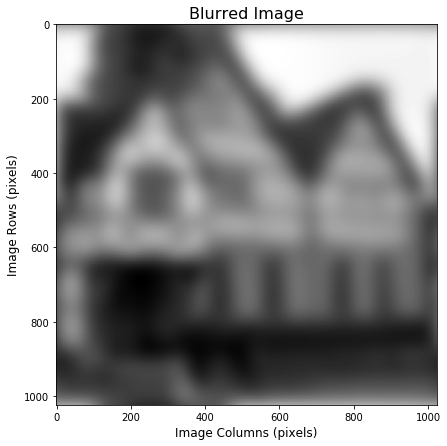

In [13]:
import numpy as np #import numpy
#load pixel data from text file
pixel_data = np.loadtxt('blur.txt') 
#import plotting tools
import matplotlib.pyplot as plt
#display blurred image
plt.figure(figsize = (7,7)) #instantiate new figure window and set size
plt.imshow(pixel_data, cmap = "gray") #display image in gray scale colour pallete
#label plot of blurred image
plt.title('Blurred Image', fontsize = 16)
plt.xlabel('Image Columns (pixels)', fontsize = 12)
plt.ylabel('Image Rows (pixels)', fontsize = 12)

# Part b)
Write a program to create an array of the same size as the photo and store values of the Gaussian psf with $\sigma = 25$ in this grid. Display a density plot of the psf as well. 

In [41]:
rows = pixel_data.shape[0] #number of rows in blurred image
cols = pixel_data.shape[1] #number of columns in blurred image
psf = np.empty([rows, cols]) #empty array we will make into Gaussian kernel
sigma = 25 #width of Gaussian
#credit to PHY407 Lab05 instructions for the below imbedded for loop to
#create Gaussian Kernel. 
for i in range(rows): 
    ip = i 
    if ip > rows/2: 
        ip -= rows # bottom half of rows moved to negative values 
    for j in range(cols): 
        jp = j 
        if jp > cols/2: 
            jp -= cols # right half of columns moved to negative values
            
        psf[i, j] = np.exp(-(ip**2 + jp**2)/(2.*sigma**2)) # compute gaussian

Text(0,0.5,'Image Rows (pixels)')

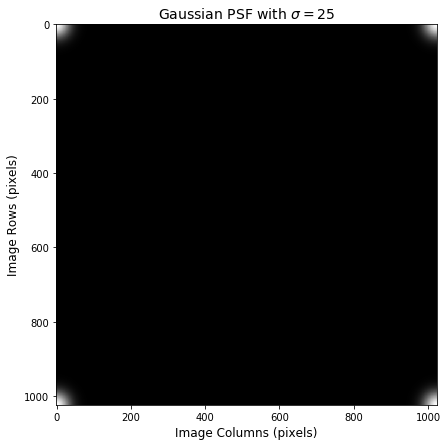

In [43]:
#display psf
plt.figure(figsize = (7,7))
plt.imshow(psf, cmap = 'gray')
plt.title('Gaussian PSF with $\sigma = 25$', fontsize = 14)
plt.xlabel('Image Columns (pixels)', fontsize = 12)
plt.ylabel('Image Rows (pixels)', fontsize = 12)

# Part c)
Here we will combine the work above along with Fourier transforms using rfft2 (numpy.fft function for 2D fast fourier transform of real sample) and irfft (numpy.fft function for 2D inverse fast fourier transfrom of real sample) to perform the following tasks:
1. Reads blurred photo.
2. Calculates the psf.
2. Fourier transforms both
3. Divides one by the other.
4. Performs an inverse transform to get the unblurred photo.
5. Displays the unblurred photo on the screen. 

In [88]:
#Tasks 1 and 2 are done in part a and b of the question
#let's start now with 3 and compute fft of blurred photo and psf
from numpy.fft import rfft2, irfft2 #get fft and ifft functions

blur_tilde = rfft2(pixel_data)
psf_tilde = rfft2(psf)

#before performing division, get rid of numbers that are two small in fft of psf
thresh = 1e-3 #suggested threshold in Newman
inds = np.where(psf_tilde <= thresh)
psf_tilde[inds] = 1 #set equal to one before division is equivalent to not dividing
#now perform the division
image_tilde = blur_tilde/(rows*cols*psf_tilde)

#inverse fourier transform to get original image
image = irfft2(image_tilde)

Text(0,0.5,'Image Rows (pixels)')

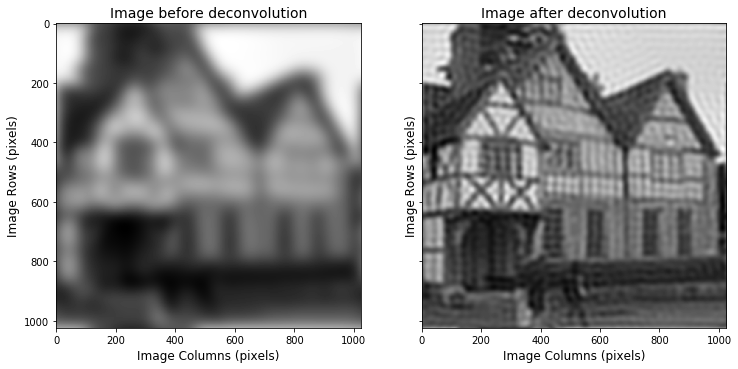

In [89]:
#display unblurred image
fd, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (12,12))
ax1.imshow(pixel_data, cmap = 'gray')
ax1.set_title('Image before deconvolution', fontsize = 14)
ax1.set_xlabel('Image Columns (pixels)', fontsize = 12)
ax1.set_ylabel('Image Rows (pixels)', fontsize = 12)
ax2.imshow(image, cmap = 'gray')
ax2.set_title('Image after deconvolution', fontsize = 14)
ax2.set_xlabel('Image Columns (pixels)', fontsize = 12)
ax2.set_ylabel('Image Rows (pixels)', fontsize = 12)

As we expected, the deconvolution has resulted in a much sharper image and we can now clearly make out that it is a picture of a house with the sky behind it. As Newman pointed out would be the case, the image is still not perfectly sharp. This is due to the fact that a deconvolution cannot account for shortcomings in sampling, pixel size, optical transfer function, or losses in information inherent to mode of image acquisition otherwise. 